#### Random Forest 


In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn 

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier 



In [2]:
def get_new_feature_name(df_old_feature_name):
    df_feature_duplicate = pd.DataFrame(data=df_old_feature_name.groupby("column_name").cumcount(), columns=["duplicate_cnt"])
    df_feature_duplicate = df_feature_duplicate.reset_index()
    df_new_feature_name = pd.merge(df_old_feature_name.reset_index(), df_feature_duplicate, how="outer")
    df_new_feature_name["column_name"] = df_new_feature_name[["column_name", "duplicate_cnt"]].apply(lambda x : x[0] + "_" +str(x[1]) if x[1]>0 else x [0], axis=1)
   
    
    df_new_feature_name = df_new_feature_name.drop(["index"], axis=1)
    return df_new_feature_name
    

In [3]:
def get_human_dataset():
    df_feature_name = pd.read_csv("E:\\workSpace_Dataset\\UCI\\UCI HAR Dataset\\features.txt", sep="\s+", header=None, names=['column_index','column_name'])
    df_new_feature_name = get_new_feature_name(df_feature_name) 
    feature_name = df_new_feature_name.iloc[:, 1].values.tolist()
   
    X_train = pd.read_csv("E:\\workSpace_Dataset\\UCI\\UCI HAR Dataset\\train\\X_train.txt", sep="\s+", names = feature_name)
    X_test = pd.read_csv("E:\\workSpace_Dataset\\UCI\\UCI HAR Dataset\\test\\X_test.txt", sep="\s+", names = feature_name)
   
    y_train = pd.read_csv("E:\\workSpace_Dataset\\UCI\\UCI HAR Dataset\\train\\y_train.txt",sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv("E:\\workSpace_Dataset\\UCI\\UCI HAR Dataset\\test\\y_test.txt",sep='\s+',header=None,names=['action'])
   
    return X_train, X_test, y_train, y_test 

In [4]:

X_train, X_test, y_train, y_test = get_human_dataset()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7352, 561)
(2947, 561)
(7352, 1)
(2947, 1)


In [6]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
predict_result = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, predict_result)
print("Accuracy of Random Forest {0:.4f}".format(accuracy))


C:\Users\lio22\AppData\Local\Temp\ipykernel_10008\1865720515.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Accuracy of Random Forest 0.9196


In [7]:
params = {"max_depth" : [8, 16, 24], 
          "min_samples_leaf":[1, 6, 12], 
          "min_samples_split": [2, 8, 16]}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("Best Hyper : {0}".format(grid_cv.best_params_))
print("Best Accuracy : {0:.4f}".format(grid_cv.best_score_))




c:\Users\lio22\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyper : {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best Accuracy : 0.9165


In [11]:
rf_clf_1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)

rf_clf_1.fit(X_train, y_train)
predict_result = rf_clf_1.predict(X_test)
print("Accuracy of Predict {0:.4f}".format(accuracy_score(y_test, predict_result)))

 

C:\Users\lio22\AppData\Local\Temp\ipykernel_10008\2315575182.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_1.fit(X_train, y_train)


Accuracy of Predict 0.9260


In [16]:
np_importances_values = rf_clf_1.feature_importances_
se_importances = pd.Series(np_importances_values, index=X_train.columns)
se_importances_top20 = se_importances.sort_values(ascending=False)[:20]


<AxesSubplot:title={'center':'Feature importances Top 20'}>

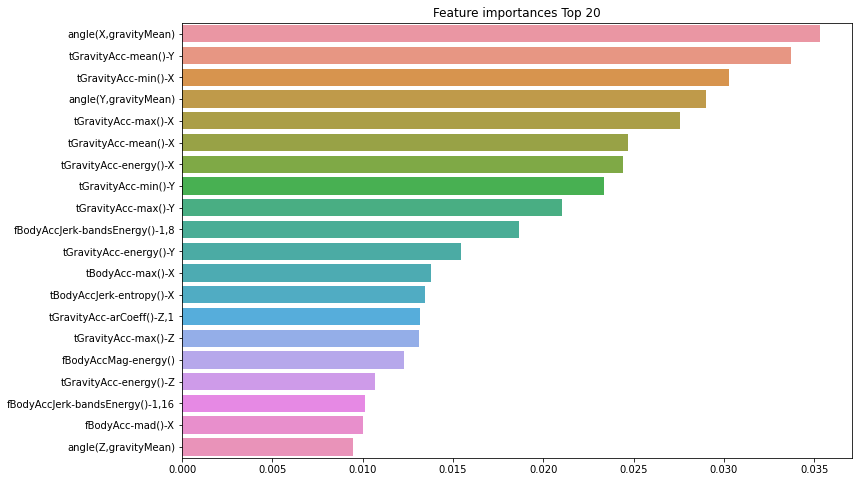

In [17]:
plt.figure(figsize=(12, 8))
plt.title("Feature importances Top 20")
sns.barplot(x=se_importances_top20, y= se_importances_top20.index)
